<a href="https://colab.research.google.com/github/SushmaRajagopal/Kaiburr-Assessment/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

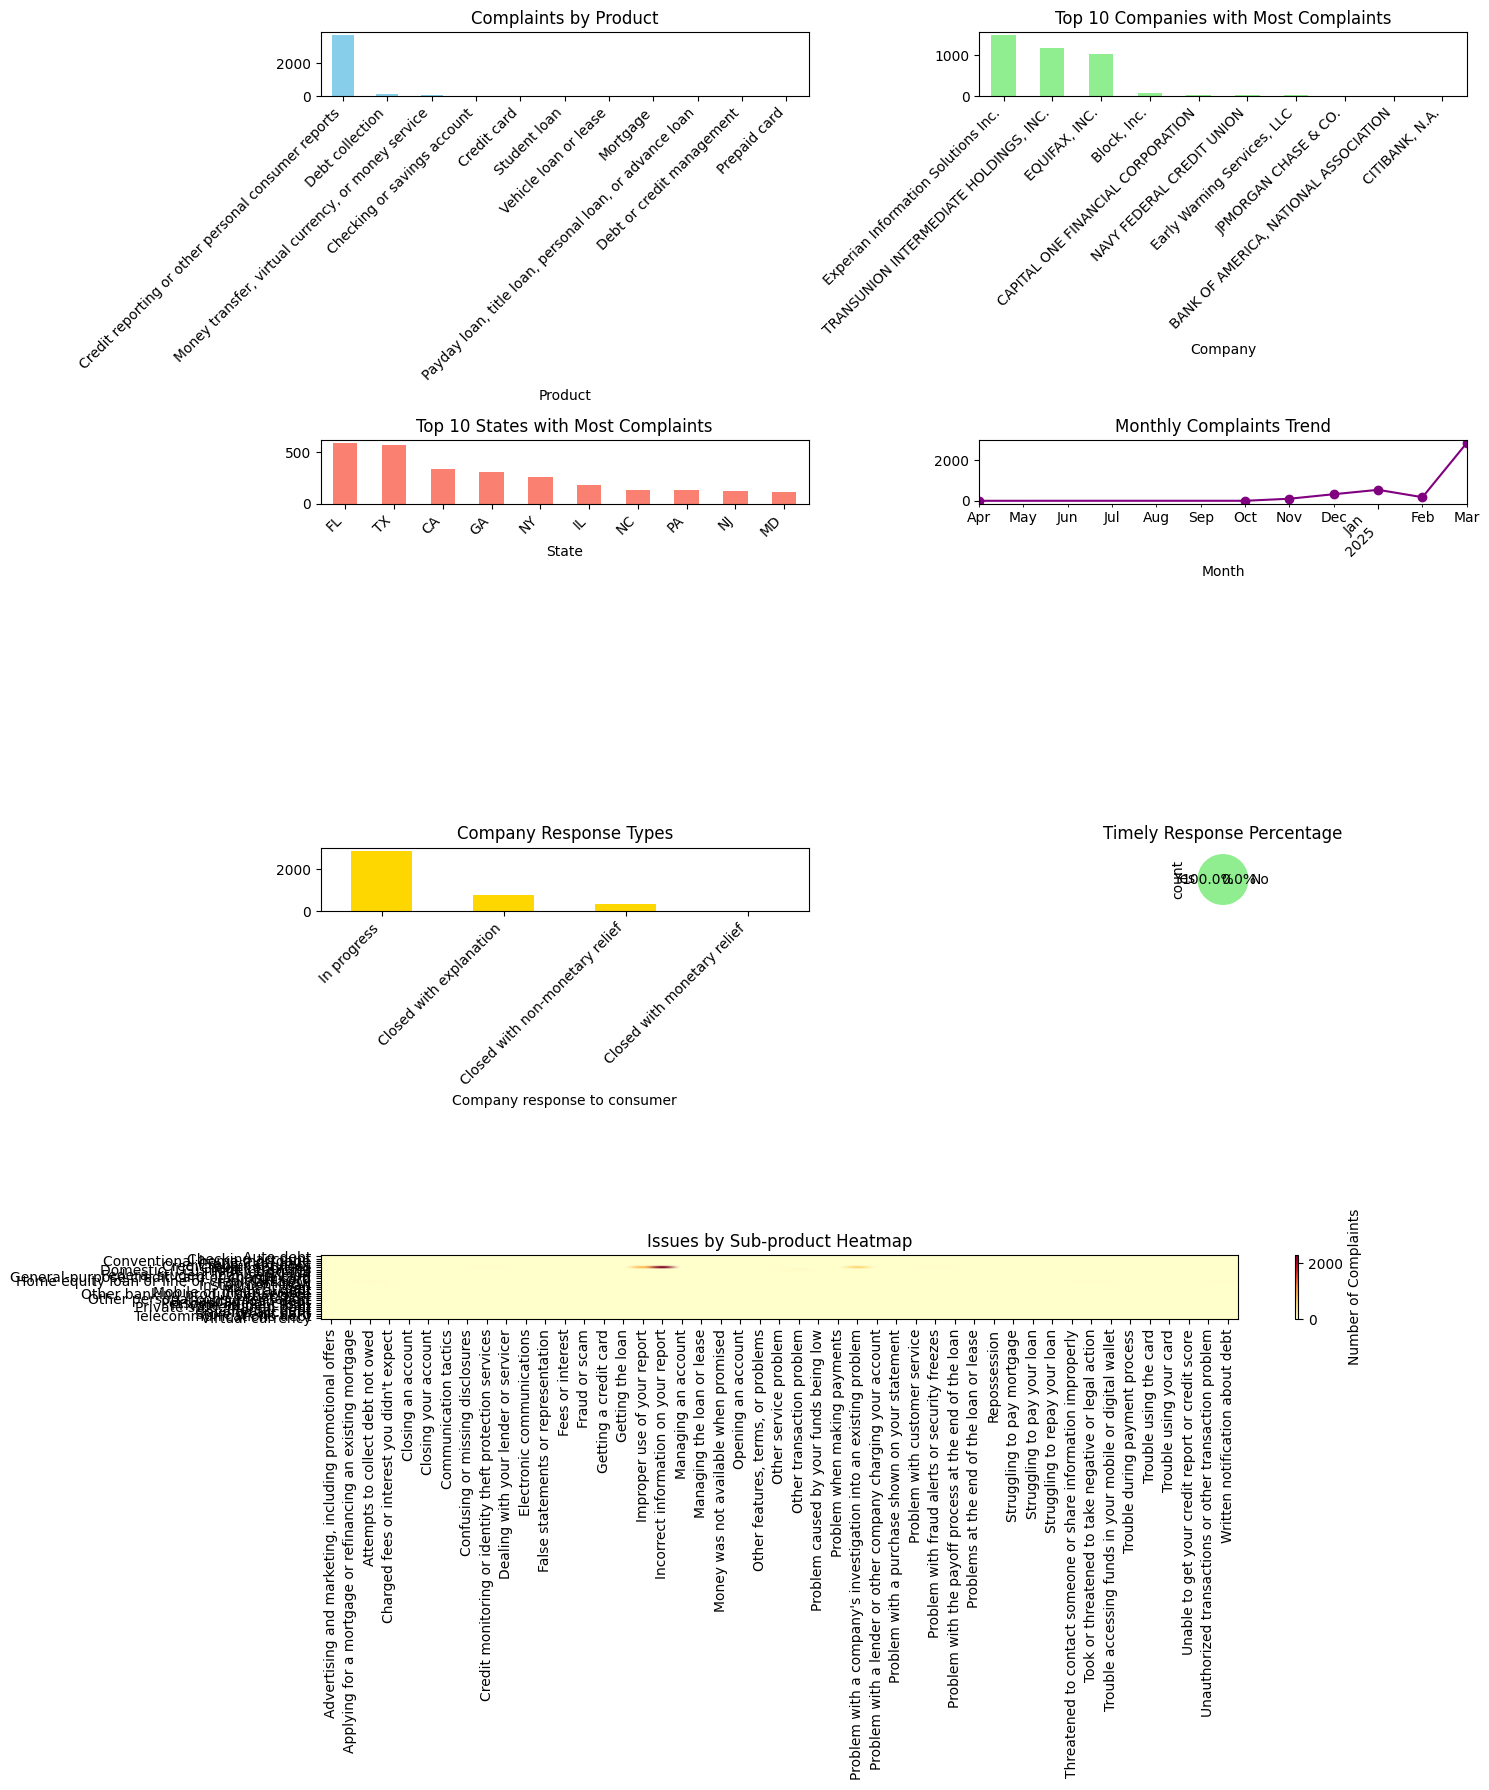


Key Insights:
1. Most complaints are about: Credit reporting or other personal consumer reports (3711 complaints)
2. Company with most complaints: Experian Information Solutions Inc. (1483 complaints)
3. State with most complaints: FL (588 complaints)
4. Most common company response: In progress (2867 cases)
5. Timely response rate: 100.0%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/complaintss.csv.xlsx', sheet_name='Sheet1')

# Data cleaning and preparation
# Convert date columns to datetime
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

# Analysis 1: Complaints by Product
product_counts = df['Product'].value_counts()

# Analysis 2: Complaints by Company
company_counts = df['Company'].value_counts().head(10)  # Top 10 companies

# Analysis 3: Complaints by State
state_counts = df['State'].value_counts().head(10)  # Top 10 states

# Analysis 4: Complaints over time (monthly)
df['Month'] = df['Date received'].dt.to_period('M')
monthly_counts = df['Month'].value_counts().sort_index()

# Analysis 5: Company response analysis
response_counts = df['Company response to consumer'].value_counts()

# Analysis 6: Timely response analysis
timely_counts = df['Timely response?'].value_counts()

# Analysis 7: Issues by Sub-product
subproduct_issues = df.groupby(['Sub-product', 'Issue']).size().unstack().fillna(0)

# Visualization
plt.figure(figsize=(15, 18))

# Plot 1: Complaints by Product
plt.subplot(4, 2, 1)
product_counts.plot(kind='bar', color='skyblue')
plt.title('Complaints by Product')
plt.xticks(rotation=45, ha='right')

# Plot 2: Top 10 Companies with Most Complaints
plt.subplot(4, 2, 2)
company_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Companies with Most Complaints')
plt.xticks(rotation=45, ha='right')

# Plot 3: Top 10 States with Most Complaints
plt.subplot(4, 2, 3)
state_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 States with Most Complaints')
plt.xticks(rotation=45, ha='right')

# Plot 4: Complaints Over Time
plt.subplot(4, 2, 4)
monthly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Complaints Trend')
plt.xticks(rotation=45, ha='right')

# Plot 5: Company Response Analysis
plt.subplot(4, 2, 5)
response_counts.plot(kind='bar', color='gold')
plt.title('Company Response Types')
plt.xticks(rotation=45, ha='right')

# Plot 6: Timely Response Analysis
plt.subplot(4, 2, 6)
timely_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Timely Response Percentage')

# Plot 7: Issues by Sub-product (heatmap)
plt.subplot(4, 2, (7,8))
plt.imshow(subproduct_issues, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Number of Complaints')
plt.xticks(range(len(subproduct_issues.columns)), subproduct_issues.columns, rotation=90)
plt.yticks(range(len(subproduct_issues.index)), subproduct_issues.index)
plt.title('Issues by Sub-product Heatmap')

plt.tight_layout()
plt.show()

# Generate insights
print("\nKey Insights:")
print(f"1. Most complaints are about: {product_counts.idxmax()} ({product_counts.max()} complaints)")
print(f"2. Company with most complaints: {company_counts.idxmax()} ({company_counts.max()} complaints)")
print(f"3. State with most complaints: {state_counts.idxmax()} ({state_counts.max()} complaints)")
print(f"4. Most common company response: {response_counts.idxmax()} ({response_counts.max()} cases)")
print(f"5. Timely response rate: {timely_counts.get('Yes', 0)/len(df)*100:.1f}%")

# Save the analysis results
analysis_results = {
    'product_counts': product_counts,
    'company_counts': company_counts,
    'state_counts': state_counts,
    'monthly_counts': monthly_counts,
    'response_counts': response_counts,
    'timely_counts': timely_counts,
    'subproduct_issues': subproduct_issues
}

# Save to Excel
with pd.ExcelWriter('complaints_analysis.xlsx') as writer:
    for name, data in analysis_results.items():
        data.to_excel(writer, sheet_name=name[:31])  # Excel sheet names max 31 chars